In [17]:
import pandas as pd
import numpy as np
import re

In [8]:
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t') #delimeter

In [9]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


df

In [11]:
df['Liked'].nunique()

2

In [12]:
df[df['Liked']==1].count()

Review    500
Liked     500
dtype: int64

In [13]:
a= df.iloc[0][0]

In [14]:
a

'Wow... Loved this place.'

In [15]:
a = a.lower()

In [18]:
a = re.sub('[^a-zA-Z]', ' ',a )

In [19]:
a

'wow    loved this place '

In [20]:
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/amolt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords

In [23]:
stop_words = stopwords.words('english')

In [24]:
alist = a.split(' ')

In [25]:
alist

['wow', '', '', '', 'loved', 'this', 'place', '']

In [26]:
from nltk.stem.porter import PorterStemmer

In [27]:
ps = PorterStemmer()

In [28]:
filtered_sentence = [ps.stem(w) for w in alist if not w in stop_words]

In [29]:
for i in alist:
    if stop_words in alist:
        alist.remove


In [30]:
filtered_sentence = ' '.join(filtered_sentence)

In [31]:
filtered_sentence

'wow    love place '

In [48]:
review_list = []

In [49]:
for i in df['Review']:
    review = re.sub('[^a-zA-Z]', ' ',i).lower().split()
    review = [ps.stem(i) for i in review if i not in stop_words]
    review = ' '.join(review)
    review_list.append(review)
    #review_list
    #review_list[i].lower()
    #review_list[i] = re.sub('[^a-zA-Z]', ' ',review_list[i])

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
cv = CountVectorizer(max_features =1500) #max_features =1500 will remove leasst occuring words

In [52]:
x =cv.fit_transform(review_list).toarray()

In [53]:
x.shape

(1000, 1500)

In [54]:
y = df['Liked'].values

In [55]:
y.shape

(1000,)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3)

In [58]:
x_train.shape


(700, 1500)

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
model = GaussianNB()

In [61]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
y_pred = model.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(y_test, y_pred)

In [65]:
cm

array([[ 80,  60],
       [ 35, 125]])

In [66]:
#using knn
error_rate1 =[]

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=2)

In [69]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [74]:
#for i in range(1,41):
 #   knn = KNeighborsClassifier(n_neighbors=i)
  #  knn.fit(x_train, y_train)
   # ypred= knn.predict(x_test)
   # error_rate1.append(np.mean(ypred != y_test))

In [75]:
ypred = knn.predict(x_test)

In [76]:
np.mean(ypred == y_test)

0.6266666666666667

In [77]:
np.mean(ypred != y_test)

0.37333333333333335

In [78]:
import matplotlib.pyplot as plt

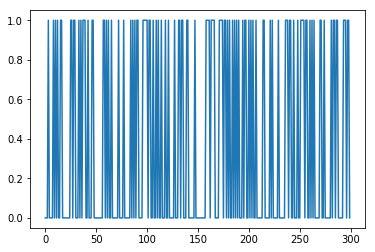

In [79]:
plt.plot(ypred != y_test)